Quantization Aware Training (QAT)

Here, I am looking at using Brevitas and pytorch for a fully connected nueral network that uses QAT
 FHE contraints force neural networks to be quantized to very low bit-widths (2-3 bit weights and activations) for good accuracy

In [2]:
import time
import warnings

import matplotlib.pyplot as plt
import numpy
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm

from concrete.ml.quantization.quantized_module import QuantizedModule
from concrete.ml.torch.compile import compile_brevitas_qat_model
     

/home/local/ASURITE/nnjungle/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Data-set generation

Generate a simple checkerboard pattern, which is a common benchmark for non-linear classifiers

(10000, 2)


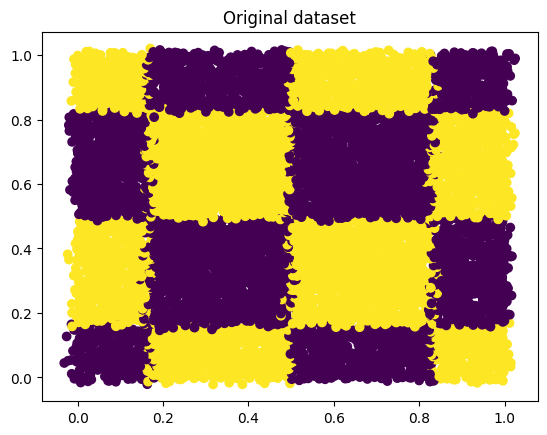

In [6]:
IN_FEAT = 2
OUT_FEAT = 2
N_SIDE = 100
N_EXAMPLE_TOTAL = N_SIDE * N_SIDE
N_TEST = 500
CLUSTERS = 3

# Generate the grid points and put them in a 2 column list of X,Y coordinates
xx, yy = numpy.meshgrid(numpy.linspace(0, 1, N_SIDE), numpy.linspace(0, 1, N_SIDE))
X = numpy.c_[numpy.ravel(xx), numpy.ravel(yy)]


# Generate the labels, using the XOR function to produce the checkerboard
y = (numpy.rint(xx * CLUSTERS).astype(numpy.int64) % 2) ^ (
    (numpy.rint(yy * CLUSTERS).astype(numpy.int64) % 2)
)
y = y.ravel()

# Add some noise to the data
X += numpy.random.randn(X.shape[0], X.shape[1]) * 0.01

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original dataset")
plt.show()

# And, finally, split it into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=N_TEST / N_EXAMPLE_TOTAL, random_state=42
)